In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
from util import show_images
%matplotlib inline

### Gradient and Color Thresholding

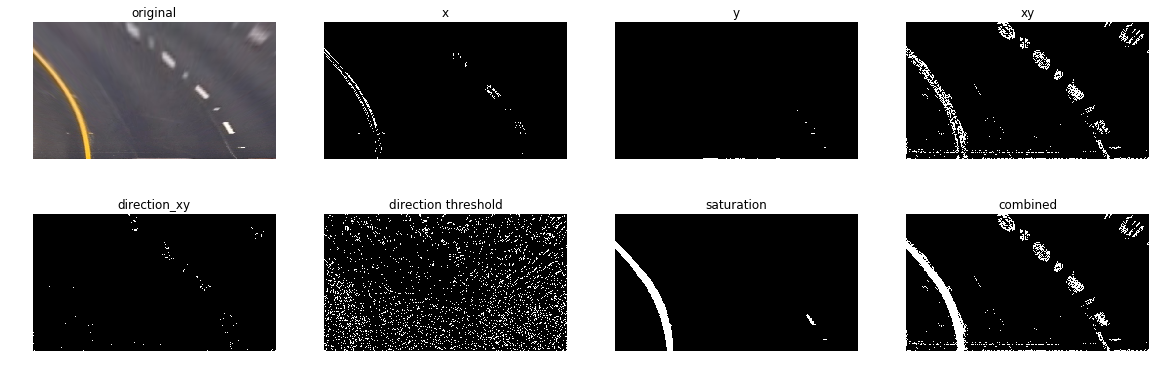

In [9]:
from collections import OrderedDict
from perspective_transform import PerspectiveTransform

def gradient(img, direction="x", kernel_size=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if direction == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    elif direction == "y":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    else:
        raise Exception("Bad Direction")
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    return scaled_sobel

def threshold(img, thresh_min, thresh_max):
    in_threshold = np.zeros(img.shape)
    in_threshold[(img >= thresh_min) & (img <= thresh_max)] = 1
    return in_threshold

def gradient_magnitude(gradx, grady):
    return np.sqrt(gradx**2 + grady**2)

def gradient_direction(gradx, grady):
    return np.arctan2(grady, gradx)

def saturation(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    return hls[:,:,2]


img = mpimg.imread('./test_images/test2.jpg')
ps = PerspectiveTransform(img.shape)
img = ps.transform(img)

sobelx = gradient(img, kernel_size=5)
sobely = gradient(img, direction='y', kernel_size=5)
sobelxy = gradient_magnitude(sobelx, sobely)
direction = gradient_direction(sobelx, sobely)
sat = saturation(img)

thresholdedx = threshold(sobelx, 40, 60)
thresholdedy = threshold(sobely, 70, 150)
thresholdedxy = threshold(sobelxy, 10, 20)
# thresholded_dir = threshold(direction, 0.8, 1.0)
thresholded_dir = threshold(direction, 0.7, 1.0)
thresholded_sat = threshold(sat, 80, 355)

plt.figure(figsize=(20, 10))
gradient_gs = gridspec.GridSpec(1, 5)

combined = np.zeros(thresholded_dir.shape)
# combined[
#     (thresholded_dir == 1) & (thresholded_sat == 1) |
#     (thresholded_dir == 1) & (thresholdedy == 1) | 
#     (thresholded_sat == 1) & (thresholdedy == 1) | 
#     (thresholded_sat == 1) & (thresholdedx == 1)
# ] = 1

combined[
    (thresholded_sat == 1) | (thresholdedxy == 1) 
] = 1

direction_xy = np.zeros(thresholded_dir.shape)
direction_xy[
    (thresholded_dir == 1) & (thresholdedxy == 1)
] = 1
# combined[((thresholdedx == 1) & (thresholdedy == 1)) | ((thresholdedxy == 1) & (dir_thresholded == 1))] = 1

gradients = OrderedDict([
    ('original', img),
    ('x', thresholdedx),
    ('y', thresholdedy),
    ('xy', thresholdedxy),
    ('direction_xy', direction_xy),
    ('direction threshold', thresholded_dir),
    ('saturation', thresholded_sat),
    ('combined', combined)
])

show_images(gradients, rows=2)

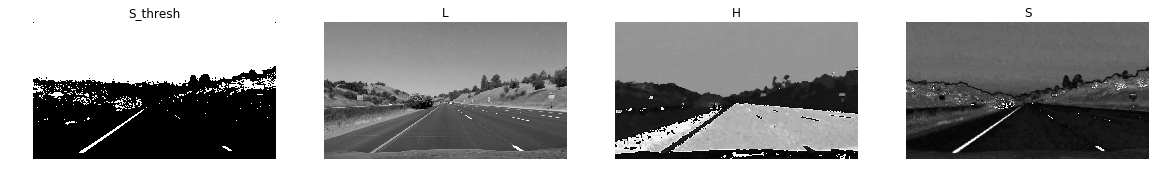

In [4]:
img = mpimg.imread('./test_images/straight_lines1.jpg')
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

# plt.imshow(S, cmap="gray")

thresh = (90, 255)
s_thresh = np.zeros_like(S)
s_thresh[(S > thresh[0]) & (S <= thresh[1])] = 1

show_images({
    "H": H,
    "L": L,
    "S": S,
    "S_thresh": s_thresh
})